In [2]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataCSV = os.path.join(os.getcwd(), "..", "CSGODemo", "Dataset", "AveragedDataset.csv")
modelSaveFolder = os.path.join(os.getcwd(), "modelSave")

df = pd.read_csv(dataCSV)

print(df.columns.tolist())

invalidRows = (df == -1).any(axis=1)

print(f"Invalid rows --> {invalidRows}")

print(df)

['Team1_Avg_Kills', 'Team1_Avg_Assists', 'Team1_Avg_Deaths', 'Team1_Avg_HeadshotsPerc', 'Team1_Avg_KR', 'Team1_Avg_KD', 'Team1_Avg_KAST', 'Team1_Avg_EntryKills', 'Team1_Avg_RWS', 'Team1_Avg_Rating', 'Team1_Avg_Rating2', 'Team1_Avg_ATD', 'Team1_Avg_ADR', 'Team1_Avg_ELO', 'Team2_Avg_Kills', 'Team2_Avg_Assists', 'Team2_Avg_Deaths', 'Team2_Avg_HeadshotsPerc', 'Team2_Avg_KR', 'Team2_Avg_KD', 'Team2_Avg_KAST', 'Team2_Avg_EntryKills', 'Team2_Avg_RWS', 'Team2_Avg_Rating', 'Team2_Avg_Rating2', 'Team2_Avg_ATD', 'Team2_Avg_ADR', 'Team2_Avg_ELO', 'Team_1_Win?', 'ScoreDifference', 'closeMatch?']
Invalid rows --> 0       False
1       False
2        True
3        True
4        True
        ...  
9522    False
9523    False
9524    False
9525    False
9526    False
Length: 9527, dtype: bool
      Team1_Avg_Kills  Team1_Avg_Assists  Team1_Avg_Deaths  \
0            20.72634            4.47970          18.94140   
1            18.99140            4.45454          20.21516   
2             3.10000      

In [4]:
invalidRows = invalidRows.reset_index(drop=True)

cleaneddf = df[df['Team_1_Win?'] != 2]
cleaneddf = cleaneddf.dropna()

print(df.shape)
print(cleaneddf.shape)

print(cleaneddf['Team_1_Win?'].unique())

(9527, 31)
(9523, 31)
[0 1]


In [5]:
abs_correlations = cleaneddf.corr()[['Team_1_Win?']].abs()

# Sort absolute correlations in descending order
sorted_abs_correlations = abs_correlations.sort_values(by='Team_1_Win?', ascending=False)

print(sorted_abs_correlations.head(30))

                         Team_1_Win?
Team_1_Win?                 1.000000
Team2_Avg_ELO               0.254010
Team1_Avg_ELO               0.253684
Team1_Avg_Kills             0.152969
Team1_Avg_RWS               0.152028
Team1_Avg_ADR               0.151157
Team2_Avg_Kills             0.134632
Team2_Avg_RWS               0.134500
Team2_Avg_ADR               0.133025
Team1_Avg_KR                0.132081
Team1_Avg_Rating2           0.126329
Team1_Avg_Rating            0.122641
Team2_Avg_KR                0.114664
Team1_Avg_KD                0.110240
Team2_Avg_Rating2           0.108511
ScoreDifference             0.105803
Team2_Avg_Rating            0.104688
Team1_Avg_KAST              0.104281
Team2_Avg_KD                0.092332
Team2_Avg_KAST              0.088721
Team2_Avg_Assists           0.067537
Team1_Avg_EntryKills        0.061277
Team1_Avg_HeadshotsPerc     0.060769
Team1_Avg_Assists           0.050326
closeMatch?                 0.046962
Team2_Avg_EntryKills        0.035535
T

In [6]:
feature_columns = [
    "Team1_Avg_ELO",
    "Team1_Avg_RWS",
    "Team1_Avg_Rating",
    "Team1_Avg_Rating2",
    "Team1_Avg_KR",
    "Team1_Avg_KD",
    "Team1_Avg_KAST",
    "Team1_Avg_ADR",
    "Team2_Avg_ELO",
    "Team2_Avg_RWS",
    "Team2_Avg_Rating",
    "Team2_Avg_Rating2",
    "Team2_Avg_KR",
    "Team2_Avg_KD",
    "Team2_Avg_KAST",
    "Team2_Avg_ADR"
]

features = cleaneddf[feature_columns]

labels = cleaneddf['Team_1_Win?']
score_diffs = cleaneddf['ScoreDifference']

print(features.shape)
print(labels.shape)

(9523, 16)
(9523,)


In [7]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)
score_train, score_test = train_test_split(score_diffs, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(score_train.shape)
print(score_test.shape)


(7618, 16)
(1905, 16)
(7618,)
(1905,)
(7618,)
(1905,)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from skopt import BayesSearchCV

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

probabilities = model.predict_proba(X_test)[:, 1]

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy --> {accuracy}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"precision --> {precision}")
print(f"recall --> {recall}")
print(f"f1 --> {f1}")
print(conf_matrix)
print(probabilities)

accuracy --> 0.8488188976377953
precision --> 0.8656565656565657
recall --> 0.8468379446640316
f1 --> 0.8561438561438561
[[760 133]
 [155 857]]
[0.23428778 0.19636684 0.80219593 ... 0.80981764 0.7786607  0.89481455]


In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [12]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Vary the number of hidden layers
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=5)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=128, step=32),
                                       activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid']),
                                       kernel_regularizer=tf.keras.regularizers.l2(hp.Choice('l2_reg_' + str(i), values=[1e-3, 1e-4, 1e-5]))))

    # Output layer with sigmoid activation for binary classification
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-4])),
                  loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
                  metrics=['accuracy'])  # You can add other metrics here

    return model

In [13]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

crossVal = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

for fold, (train_index, val_index) in enumerate(crossVal.split(X_train, y_train_np)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]
    
    # Create a new instance of RandomSearch for each fold with a unique project name
    tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=100, executions_per_trial=3, directory='modelSave', project_name=f'CSGOModel_fold_1')
    
    # Perform hyperparameter search on the current fold
    tuner.search(X_train_fold, y_train_fold, epochs=100, validation_data=(X_val_fold, y_val_fold))
    
    # Retrieve the best model for this fold
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Now you can evaluate or make predictions with the best_model
    # For example, you can use the following to get evaluation metrics
    eval_metrics = best_model.evaluate(X_val_fold, y_val_fold)
    print(f"Fold {fold + 1} evaluation metrics:", eval_metrics)

INFO:tensorflow:Reloading Tuner from modelSave\CSGOModel_fold_1\tuner0.json
INFO:tensorflow:Oracle triggered exit


C:\Users\S_CSIS-PostGrad\AppData\Local\Temp\ipykernel_8864\2382047282.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


48/48 [==============================] - 0s 725us/step - loss: 0.3930 - accuracy: 0.8602
Fold 1 evaluation metrics: [0.3929528594017029, 0.8602362275123596]
INFO:tensorflow:Reloading Tuner from modelSave\CSGOModel_fold_1\tuner0.json
INFO:tensorflow:Oracle triggered exit
48/48 [==============================] - 0s 683us/step - loss: 0.4052 - accuracy: 0.8563
Fold 2 evaluation metrics: [0.4051890969276428, 0.8562992215156555]
INFO:tensorflow:Reloading Tuner from modelSave\CSGOModel_fold_1\tuner0.json
INFO:tensorflow:Oracle triggered exit
48/48 [==============================] - 0s 720us/step - loss: 0.4181 - accuracy: 0.8438
Fold 3 evaluation metrics: [0.41813626885414124, 0.8438320159912109]
INFO:tensorflow:Reloading Tuner from modelSave\CSGOModel_fold_1\tuner0.json
INFO:tensorflow:Oracle triggered exit
48/48 [==============================] - 0s 870us/step - loss: 0.4215 - accuracy: 0.8418
Fold 4 evaluation metrics: [0.421530157327652, 0.8417596817016602]
INFO:tensorflow:Reloading Tune

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)

best_model.fit(train_dataset, epochs = 100, validation_data=test_dataset)

predicted_probabilities = best_model.predict(test_dataset)


In [18]:
from tensorflow.keras.models import save_model

best_trial = tuner.oracle.get_best_trials(1)[0]

best_model = tuner.get_best_models(1)[0]

best_model_checkpoint = 'bestModel/best_model.h5'

save_model(best_model, best_model_checkpoint)

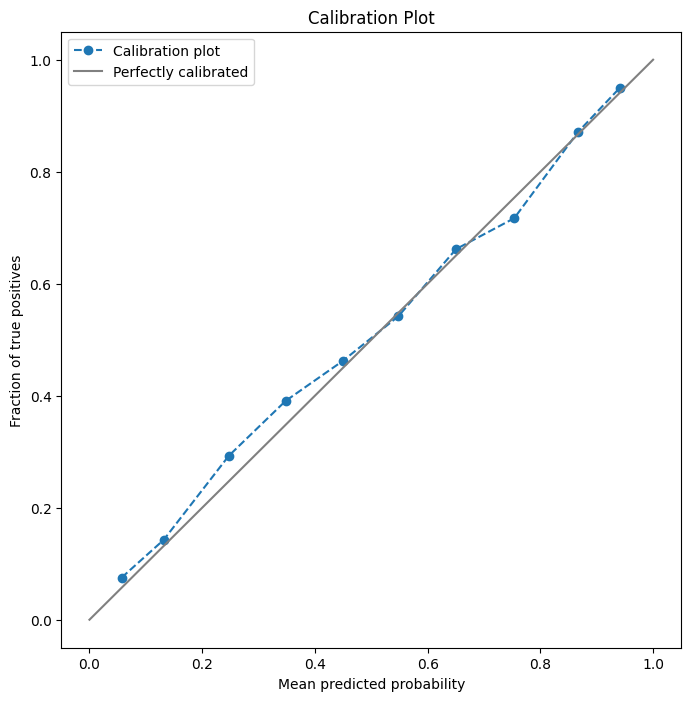

In [16]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, predicted_probabilities, n_bins=10)

plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', label='Calibration plot')
plt.plot([0, 1], [0, 1], color='gray', linestyle='-', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of true positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import brier_score_loss

brier_loss = brier_score_loss(y_test, predicted_probabilities)

print(f'brier loss --> {brier_loss}')

brier loss --> 0.10134591055311747


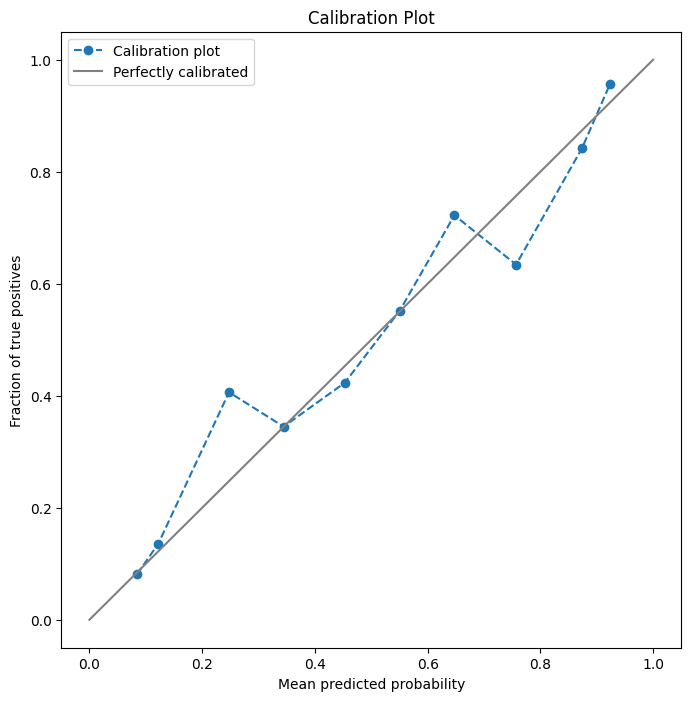

In [19]:
X_calib, X_val, y_calib, y_val = train_test_split(predicted_probabilities, y_test, test_size=0.2, random_state=42)

calib_model = LogisticRegression(max_iter=1000)
calib_model.fit(X_calib, y_calib)

calibrated_probabilities = calib_model.predict_proba(X_val)[:, 1]

prob_true, prob_pred = calibration_curve(y_val, calibrated_probabilities, n_bins=10)

plt.figure(figsize=(8, 8))
plt.plot(prob_pred, prob_true, marker='o', linestyle='--', label='Calibration plot')
plt.plot([0, 1], [0, 1], color='gray', linestyle='-', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of true positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()